In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split,KFold
from functools import reduce

D:\software\anaconda\envs\dnn\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
use_n=10000
x1=np.random.random(use_n)*100-50
x2=np.random.random(use_n)*100-50
input_x=pd.DataFrame({'x1':x1,'x2':x2})
input_y=input_x.apply(lambda x: 1 if reduce(lambda x1,x2:x1*x2,x)>0 else 0,1)


train_x,test_x,train_y,test_y=train_test_split(input_x,input_y,test_size=0.3)
input_y=np.array(train_y).reshape([train_y.shape[0],1]).T
input_x=np.array(train_x).T
test_y=np.array(test_y).reshape([test_y.shape[0],1]).T
test_x=np.array(test_x).T

Instructions for updating:
Use `tf.global_variables_initializer` instead.
After 0 iteration:
0.73102134
0.7696359
After 100 iteration:
0.60962343
0.60111105
After 200 iteration:
0.6057799
0.6029396
After 300 iteration:
0.5902141
0.6014123
After 400 iteration:
0.6209779
0.59997624
After 500 iteration:
0.60612386
0.60041034
After 600 iteration:
0.5753828
0.6037778
After 700 iteration:
0.6323671
0.6004199
After 800 iteration:
0.5639862
0.601065
After 900 iteration:
0.61332875
0.59932536
[[ -0.52450776  -0.1045263 ]
 [ -2.5010116  -37.96433   ]
 [-42.588318     1.2217172 ]
 [ -0.4753679    2.7002068 ]]


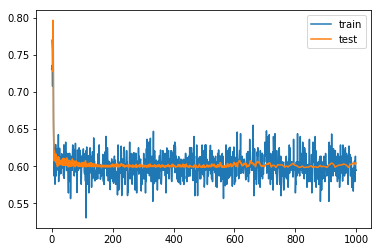

In [4]:
small_test=tf.Graph()
with small_test.as_default():
    #正向传播
    x_place=tf.placeholder('float',(2,None),name='x')
    y_place=tf.placeholder('float',(1,None),name='y')
    
    All_x = np.empty(shape=[1,2])
    All_y = np.empty(shape=[1,1])
    w1=tf.Variable(tf.random_normal([4,2],stddev=1,seed=100),name='w1')
    t1=tf.matmul(w1,x_place,name='t1')
    a1=tf.nn.relu(t1,name='a1')
    w2=tf.Variable(tf.random_normal([1,4],stddev=1,seed=100),name='w2')
    t2=tf.matmul(w2,a1,name='t2')
    a2=tf.nn.sigmoid(t2,name='output')
    cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=a2,labels=y_place))
    
    #反向传播
    l_r=tf.Variable(0.,'l_r')
    mm=tf.Variable(0.,'mm')
    
    #优化器设定
    #动量
    train=tf.train.MomentumOptimizer(learning_rate=l_r,momentum=mm).minimize(cost)
    #梯度下降，全量样本训练为gd，抽样为sgd
    #train=tf.train.GradientDescentOptimizer(learning_rate=l_r).minimize(cost)
    init = tf.initialize_all_variables()
    sess = tf.Session()
    with sess.as_default():
        sess.run(init)
    loss_list=[]
    test_list=[]
    for  i in list(range(1000)):
        #rate=1
        rate=max([(1-1/300)*10+0.1,0.1])
        #mmr=0.99
        mmr=min([i/600*0.99,0.99])
        sess.run(tf.assign(l_r, rate))
        sess.run(tf.assign(mm, mmr))
        batch=list(pd.Series(range(input_y.shape[1])).sample(100))

        if i%100==0:
            print("After %d iteration:"%i)
            print(sess.run(cost,feed_dict={y_place:input_y[:,batch],x_place:input_x[:,batch]}))
            print(sess.run(cost,feed_dict={y_place:test_y,x_place:test_x}))

        t=sess.run(cost,feed_dict={y_place:test_y,x_place:test_x})
        a=sess.run(cost,feed_dict={y_place:input_y[:,batch],x_place:input_x[:,batch]})
        
        loss_list.append(a)
        test_list.append(t)
        sess.run(train,feed_dict={y_place:input_y,x_place:input_x})

    print(sess.run(w1))
%matplotlib inline
a=pd.DataFrame({'train':loss_list,'test':test_list})
a.plot(kind='line')  